Make sure that matplotlib's figures are inlined in the notebook:

In [21]:
%matplotlib inline

Let's import NumPy:

In [22]:
import numpy as np

We'll also need the wrapper:

In [23]:
import fftwrapper

Let's define the frequencies variables:

In [24]:
f0s = np.array([1.0, 5.0, 2.5]) # Center frequencies
T0s = 1.0 / f0s                 # Periods
o0s  = 2.0 * np.pi * f0s        # Angular frequencies

The duration of the total signal will be 10 times the longest period:

In [25]:
nT = 10.0

Other time variables:

In [26]:
nt = 200                        # Nb of time steps
tmax = nT * T0s.max()
time = np.linspace(0.0, tmax, nt)
dt = time[1] - time[0]

Let's build the total signal:

In [27]:
signal = np.zeros(nt, dtype=np.complex128)
for i in range(len(T0s)):
    # Real signal: negative and positive frequencies
    #signal += np.cos(o0s[i] * time)
    # Complex signal: only positive frequencies
    signal += np.cos(o0s[i] * time) + 1.0j*np.sin(o0s[i] * time)

Calculate the FFT using the wrapper:

In [28]:
fft = fftwrapper.FFT()
fft.Set_Time_Signal(time, signal, resize_NFFT = 0)        # No resizing
#fft.Set_Time_Signal(time, signal, resize_NFFT = -1)       # Resize to lower closest power of 2
#fft.Set_Time_Signal(time, signal, resize_NFFT = +1)       # Resize to upper closest power of 2
#fft.Set_Time_Signal(time, signal, resize_NFFT = 10*nt)    # Resize to specific value

We are ready to plot!

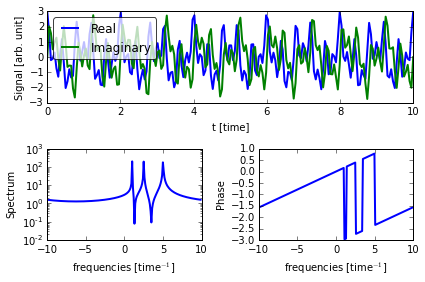

In [29]:
fft.Plot()